In [799]:
import pandas as pd
import numpy as np
import sklearn
import math
import matplotlib.pyplot as plt

In [800]:
df = pd.read_csv('model_data.csv')

In [801]:
df.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,...,DBPM,3P%,2P%,FT%,TmNetRtg,Next Rtg,Next WS,Veteran Value,VV Class,Starters
0,1,1997,Vinny Del,SG,30.0,SAS,72.0,2243.0,14.4,0.529,...,-2.3,0.314,0.501,0.868,-8.8,4.4,3.7,2903.225806,0,1
1,3,1997,Avery Johnson,PG,31.0,SAS,76.0,2472.0,15.0,0.517,...,-3.0,0.231,0.487,0.690,-8.8,4.4,6.7,14558.823529,0,1
2,7,1997,Charles Barkley,PF,33.0,HOU,53.0,2009.0,23.0,0.581,...,2.8,0.283,0.569,0.694,4.7,-0.9,8.6,-1276.595745,1,1
3,8,1997,Clyde Drexler,SG,34.0,HOU,62.0,2271.0,19.9,0.548,...,1.7,0.355,0.493,0.750,4.7,-0.9,6.8,-2407.407407,1,1
4,9,1997,Mario Elie,SF,33.0,HOU,78.0,2687.0,14.3,0.662,...,0.1,0.420,0.572,0.896,4.7,-0.9,3.8,-8595.505618,1,1


## Pre-Processing

In [802]:
df.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER',
       'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', '3P%', '2P%',
       'FT%', 'TmNetRtg', 'Next Rtg', 'Next WS', 'Veteran Value', 'VV Class',
       'Starters'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

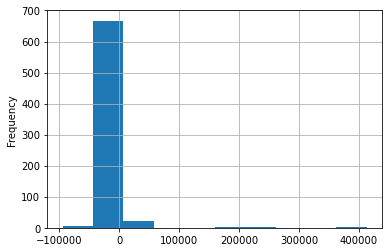

In [803]:
df['Veteran Value'].plot.hist(grid=True)

In [804]:
# calculate summary statistics
data = df['Veteran Value']
data_mean, data_std = np.mean(data), np.std(data)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
print(lower, upper)
lower, upper = -30000,30000

-63806.593259548616 63843.64009831145


In [805]:
outliers = [x[0] for x in enumerate(df['Veteran Value']) if x[1] < lower or x[1] > upper]
outliers

[30, 76, 134, 154, 200, 201, 209, 210, 212, 285, 372, 462, 463, 507, 646]

In [806]:
df.drop(index=outliers,inplace=True)

<AxesSubplot:ylabel='Frequency'>

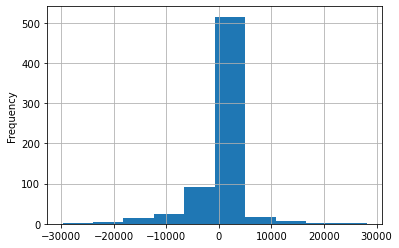

In [807]:
df['Veteran Value'].plot.hist(grid=True)

[  1.   5.  14.  24.  92. 515.  18.   8.   2.   3.] [-29700.         -23915.18518519 -18130.37037037 -12345.55555556
  -6560.74074074   -775.92592593   5008.88888889  10793.7037037
  16578.51851852  22363.33333333  28148.14814815]


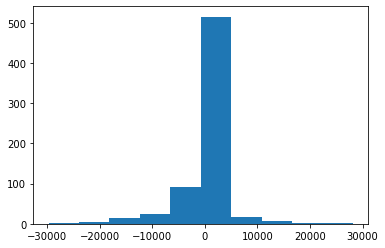

In [808]:
n, bins, patches = plt.hist(df['Veteran Value'])
print(n,bins)

In [809]:
d25, d50, d75 = df['Veteran Value'].describe()['25%'], df['Veteran Value'].describe()['50%'], df['Veteran Value'].describe()['75%']
print(d25,d50,d75)

-111.07763642196258 4.063034188034188 72.42417484388938


In [810]:
print(df['Veteran Value'].quantile(0.16),df['Veteran Value'].quantile(0.33),df['Veteran Value'].quantile(0.49),
      df['Veteran Value'].quantile(0.66),df['Veteran Value'].quantile(0.82))
print(df['Veteran Value'].quantile(0.1))

-1453.8579699870036 0.7087373931623937 3.8425862785862783 26.67838246409676 191.38301043219113
-3960.123395935909


In [811]:
target = df['Veteran Value']

def getClass(vv):
    if vv < -1500:
        return 0
    elif -1500 <= vv < 0:
        return 1
    elif 0 <= vv < 4:
        return 2
    elif 4 <= vv < 26:
        return 3
    elif 26 <= vv < 190:
        return 4
    elif vv > 190:
        return 5
    
df['VV Class'] = [getClass(vv) for vv in df['Veteran Value']]
target_class = df['VV Class']

In [812]:
df['Veteran Value'].describe()

count      682.000000
mean      -459.436382
std       4583.576145
min     -29700.000000
25%       -111.077636
50%          4.063034
75%         72.424175
max      28148.148148
Name: Veteran Value, dtype: float64

In [813]:
df.drop(['Unnamed: 0','Age','Year','Player','Pos','Tm','Next WS','WS','Next Rtg','TmNetRtg','Veteran Value', 'VV Class'], axis=1, inplace=True)

In [814]:
df.columns

Index(['G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS/48', 'OBPM', 'DBPM', '3P%',
       '2P%', 'FT%', 'Starters'],
      dtype='object')

In [815]:
#try scaling values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)


In [816]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(scaled_data, target_class.values, random_state=42)

### Logistic Regression Classifier

In [817]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
clf = LogisticRegression(tol=1e-4, max_iter=1000, random_state=0).fit(xtrain, ytrain)
clf.predict(xtest)
clf.predict_proba(xtest)
clf.score(xtest,ytest)

0.30409356725146197

In [818]:
metrics.roc_auc_score(ytest,clf.predict_proba(xtest),multi_class='ovr')

0.6026569540525504

### KNN Classifier

In [819]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

n_neighbors=15
neigh = KNeighborsClassifier(n_neighbors)
neigh.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=15)

In [820]:
neigh.predict_proba(xtest)
neigh.score(xtest,ytest)

0.21052631578947367

In [821]:
metrics.roc_auc_score(ytest,neigh.predict_proba(xtest),multi_class='ovr')

0.5241669381739964

### Random Forests Classifier

In [822]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=250, max_depth=50, min_samples_leaf=10, min_samples_split = 10, max_features=10)
rf.fit(xtrain, ytrain)
rf.predict_proba(xtest)
rf.score(xtest,ytest)

0.23976608187134502

In [823]:
metrics.roc_auc_score(ytest,rf.predict_proba(xtest),multi_class='ovr')

0.5764425359480629

### Boosted Classifier


In [824]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(min_samples_split=2**6, max_depth=10), 
                         n_estimators=225, learning_rate=0.5)
abc.fit(xtrain, ytrain)
abc.predict_proba(xtest)
abc.score(xtest,ytest)

0.2046783625730994

In [825]:
metrics.roc_auc_score(ytest,abc.predict_proba(xtest),multi_class='ovr')

0.5613385083743077

### Neural Network

In [826]:
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier(hidden_layer_sizes=(1000,100,10),activation='relu',learning_rate_init=0.001,batch_size=256, verbose=True,max_iter=100)
mlpc.fit(xtrain, ytrain)
mlpc.predict_proba(xtest)
mlpc.score(xtest,ytest)


Iteration 1, loss = 1.78176953
Iteration 2, loss = 1.77110914
Iteration 3, loss = 1.76066213
Iteration 4, loss = 1.75488790
Iteration 5, loss = 1.74986526
Iteration 6, loss = 1.74761929
Iteration 7, loss = 1.74321192
Iteration 8, loss = 1.73901578
Iteration 9, loss = 1.73518958
Iteration 10, loss = 1.73250267
Iteration 11, loss = 1.72976663
Iteration 12, loss = 1.72768117
Iteration 13, loss = 1.72449354
Iteration 14, loss = 1.72112482
Iteration 15, loss = 1.71899735
Iteration 16, loss = 1.71556597
Iteration 17, loss = 1.71301116
Iteration 18, loss = 1.70963476
Iteration 19, loss = 1.70835225
Iteration 20, loss = 1.70358726
Iteration 21, loss = 1.70097191
Iteration 22, loss = 1.69869222
Iteration 23, loss = 1.69571662
Iteration 24, loss = 1.69255455
Iteration 25, loss = 1.68901567
Iteration 26, loss = 1.68704390
Iteration 27, loss = 1.68325353
Iteration 28, loss = 1.68025380
Iteration 29, loss = 1.67685191
Iteration 30, loss = 1.67436711
Iteration 31, loss = 1.67106272
Iteration 32, los

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.27485380116959063

In [827]:
metrics.roc_auc_score(ytest,mlpc.predict_proba(xtest),multi_class='ovr')

0.5856351307467246

### Voting Classifier

In [828]:
from sklearn.ensemble import VotingClassifier 
from sklearn.ensemble import StackingClassifier

estimator = [] 
estimator.append(('RFC',rf))
estimator.append(('LRC',clf))
estimator.append(('ABC',abc))
estimator.append(('MLP',mlpc))


vot_soft = VotingClassifier(estimators = estimator, voting='soft', verbose=True) 
vot_soft.fit(xtrain, ytrain)
vot_soft.predict_proba(xtest)
vot_soft.score(xtest,ytest)

[Voting] ...................... (1 of 4) Processing RFC, total=   0.8s
[Voting] ...................... (2 of 4) Processing LRC, total=   0.1s
[Voting] ...................... (3 of 4) Processing ABC, total=   1.4s
Iteration 1, loss = 1.89478260
Iteration 2, loss = 1.85148519
Iteration 3, loss = 1.83037064
Iteration 4, loss = 1.81318647
Iteration 5, loss = 1.80498102
Iteration 6, loss = 1.79108830
Iteration 7, loss = 1.78118498
Iteration 8, loss = 1.77363013
Iteration 9, loss = 1.77338826
Iteration 10, loss = 1.76762983
Iteration 11, loss = 1.75889422
Iteration 12, loss = 1.75519932
Iteration 13, loss = 1.75073056
Iteration 14, loss = 1.74469500
Iteration 15, loss = 1.74012525
Iteration 16, loss = 1.73727894
Iteration 17, loss = 1.73417170
Iteration 18, loss = 1.72936429
Iteration 19, loss = 1.72592051
Iteration 20, loss = 1.72220170
Iteration 21, loss = 1.72030870
Iteration 22, loss = 1.71610475
Iteration 23, loss = 1.71369434
Iteration 24, loss = 1.71163046
Iteration 25, loss = 1.70880

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.26900584795321636

In [829]:
metrics.roc_auc_score(ytest,vot_soft.predict_proba(xtest),multi_class='ovr')

0.5929901650462347

## Test on Veterans of 2021-2022 Season

Data Cleaning for NBA 2021-2022

In [830]:
import pandas as pd
import numpy as np
data = pd.read_csv('compiled.csv')

In [831]:
data1 = data[data['Year']==2020]
data2 = data[data['Year']==2021]
new_data = pd.concat([data1,data2])
data2 = data2.copy()

In [832]:
import math
next_rtg = []
for index, row in new_data.iterrows():
    current_team = row['Tm']
    next_year = row['Year'] + 1
    
    try:
        rtg = new_data.loc[(new_data['Tm'] == current_team) & (new_data['Year'] == next_year)].iloc[0]['TmNetRtg']
        next_rtg.append(rtg)
    except:
        next_rtg.append(math.nan)

In [833]:
new_data['Next Rtg'] = next_rtg
#new_data = new_data.dropna()

In [834]:
new_data.tail()

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,DWS,WS,WS/48,OBPM,DBPM,3P%,2P%,FT%,TmNetRtg,Next Rtg
1462,2021,Garrett Temple,SG,34.0,CHI,56.0,1528.0,8.2,0.525,0.525,...,1.4,1.6,0.050,-3.3,-0.1,0.335,0.503,0.800,-1.1,NaN
1463,2021,Thaddeus Young,PF,32.0,CHI,68.0,1652.0,20.3,0.578,0.068,...,2.2,5.1,0.147,2.0,1.2,0.267,0.580,0.628,-1.1,NaN
1464,2021,Nikola Vuƒçeviƒá,C,30.0,ORL,44.0,1500.0,23.5,0.565,0.317,...,1.8,3.9,0.125,5.5,0.1,0.406,0.515,0.827,-9.3,NaN
1465,2021,Kemba Walker,PG,30.0,BOS,43.0,1369.0,17.7,0.559,0.522,...,1.1,3.3,0.115,2.5,-0.7,0.360,0.486,0.899,1.2,NaN
1466,2021,John Wall,PG,30.0,HOU,40.0,1288.0,15.4,0.503,0.343,...,0.8,-0.2,-0.007,1.4,-1.6,0.317,0.449,0.749,-7.4,NaN


In [835]:
next_ws = []
for index, row in new_data.iterrows():
    current_player = row['Player']
    next_year = row['Year'] + 1
    
    try:
        ws = new_data.loc[(new_data['Player'] == current_player) & (new_data['Year'] == next_year)].iloc[0]['WS']
        next_ws.append(ws)
    except:
        next_ws.append(math.nan)

In [836]:
new_data['Next WS'] = next_ws
new_data.head()

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,WS,WS/48,OBPM,DBPM,3P%,2P%,FT%,TmNetRtg,Next Rtg,Next WS
1377,2020,LaMarcus Aldridge,C,34.0,SAS,53.0,1754.0,19.7,0.571,0.198,...,4.5,0.122,1.8,-0.5,0.389,0.519,0.827,-0.9,-1.5,NaN
1378,2020,DeMar DeRozan,SF,30.0,SAS,68.0,2316.0,21.6,0.603,0.033,...,7.3,0.151,2.3,-0.4,0.257,0.540,0.845,-0.9,-1.5,7.4
1379,2020,Rudy Gay,PF,33.0,SAS,67.0,1461.0,15.4,0.553,0.369,...,2.1,0.068,0.0,-0.9,0.336,0.511,0.882,-0.9,-1.5,1.7
1380,2020,Patty Mills,PG,31.0,SAS,66.0,1485.0,14.8,0.592,0.674,...,2.8,0.091,1.2,-1.2,0.382,0.533,0.866,-0.9,-1.5,2.2
1381,2020,Carmelo Anthony,PF,35.0,POR,58.0,1902.0,12.4,0.525,0.289,...,1.3,0.033,-1.8,-1.8,0.385,0.448,0.845,-1.1,1.8,2.6


In [837]:
new_data.head()

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,WS,WS/48,OBPM,DBPM,3P%,2P%,FT%,TmNetRtg,Next Rtg,Next WS
1377,2020,LaMarcus Aldridge,C,34.0,SAS,53.0,1754.0,19.7,0.571,0.198,...,4.5,0.122,1.8,-0.5,0.389,0.519,0.827,-0.9,-1.5,NaN
1378,2020,DeMar DeRozan,SF,30.0,SAS,68.0,2316.0,21.6,0.603,0.033,...,7.3,0.151,2.3,-0.4,0.257,0.540,0.845,-0.9,-1.5,7.4
1379,2020,Rudy Gay,PF,33.0,SAS,67.0,1461.0,15.4,0.553,0.369,...,2.1,0.068,0.0,-0.9,0.336,0.511,0.882,-0.9,-1.5,1.7
1380,2020,Patty Mills,PG,31.0,SAS,66.0,1485.0,14.8,0.592,0.674,...,2.8,0.091,1.2,-1.2,0.382,0.533,0.866,-0.9,-1.5,2.2
1381,2020,Carmelo Anthony,PF,35.0,POR,58.0,1902.0,12.4,0.525,0.289,...,1.3,0.033,-1.8,-1.8,0.385,0.448,0.845,-1.1,1.8,2.6


In [838]:
#change_rtg.replace([np.inf, -np.inf], np.nan, inplace=True)
#change_rtg.dropna(inplace=True)

In [839]:
#change_ws.dropna(inplace=True)

In [840]:
new_data = new_data.dropna()

In [841]:
change_rtg = 100*((new_data['Next Rtg'] - new_data['TmNetRtg']).divide(new_data['TmNetRtg'].abs()))

In [842]:
change_ws = 100*((new_data['Next WS'] - new_data['WS'])/abs(new_data['WS']))

In [843]:
z = zip(change_ws, change_rtg)
targets = []
target_class = []
#tgt represents decline
for t in z:
    d_ws = float(t[0])
    d_rtg = float(t[1])
    RTG_UP = (d_rtg > 0)
    RTG_DOWN = (d_rtg < 0)
    WS_UP = (d_ws >= 0)
    
    
    if RTG_UP:
        vv = d_rtg * d_ws
    else:
        if WS_UP:
            vv = -1*d_rtg 
        else:
            vv = d_rtg / d_ws
        
        
    
    targets.append(vv)
    target_class.append(0 if vv >= 0 else 1)
    
new_data['Veteran Value'] = targets
new_data['VV Class'] = target_class

In [844]:
def getClass(vv):
    if vv < -5000:
        return 0
    elif -5000 <= vv < -1000:
        return 1
    elif -1000 <= vv < 0:
        return 2
    elif 0 <= vv < 1250:
        return 3
    elif 1250 <= vv < 8500:
        return 4
    elif vv > 8500:
        return 5
    
new_data['VV Class'] = [getClass(vv) for vv in new_data['Veteran Value']]
target_class = new_data['VV Class']

In [845]:
new_data.sort_values(by=['Veteran Value'])

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OBPM,DBPM,3P%,2P%,FT%,TmNetRtg,Next Rtg,Next WS,Veteran Value,VV Class
1416,2020,Paul Millsap,PF,34.0,DEN,51.0,1240.0,16.9,0.591,0.283,...,0.3,-0.2,0.435,0.500,0.816,2.2,4.8,3.2,-1012.987013,1
1388,2020,Eric Bledsoe,PG,30.0,MIL,61.0,1646.0,17.6,0.571,0.306,...,0.8,1.1,0.344,0.533,0.790,9.4,5.8,2.3,0.667124,3
1391,2020,Wesley Matthews,SG,33.0,MIL,67.0,1635.0,8.1,0.547,0.704,...,-2.6,0.7,0.364,0.472,0.765,9.4,5.8,1.7,0.817021,3
1410,2020,LeBron James,PG,35.0,LAL,67.0,2316.0,25.5,0.577,0.326,...,6.6,1.8,0.348,0.564,0.693,5.6,2.9,5.6,1.125000,3
1409,2020,Dwight Howard,C,34.0,LAL,69.0,1306.0,18.7,0.696,0.018,...,-1.0,1.2,0.600,0.732,0.514,5.6,2.9,4.0,1.859694,3
1401,2020,Kyle Lowry,PG,33.0,TOR,58.0,2098.0,17.7,0.590,0.580,...,2.2,1.0,0.352,0.504,0.857,6.1,-0.4,4.1,2.350530,3
1380,2020,Patty Mills,PG,31.0,SAS,66.0,1485.0,14.8,0.592,0.674,...,1.2,-1.2,0.382,0.533,0.866,-0.9,-1.5,2.2,3.111111,3
1379,2020,Rudy Gay,PF,33.0,SAS,67.0,1461.0,15.4,0.553,0.369,...,0.0,-0.9,0.336,0.511,0.882,-0.9,-1.5,1.7,3.500000,3
1412,2020,Justin Holiday,SG,30.0,IND,73.0,1826.0,12.1,0.585,0.681,...,-0.5,1.8,0.405,0.477,0.791,1.9,0.1,3.1,3.617225,3
1390,2020,Brook Lopez,C,31.0,MIL,68.0,1817.0,15.0,0.551,0.484,...,-0.4,2.5,0.314,0.549,0.836,9.4,5.8,5.3,10.531915,3


In [846]:
players = new_data.loc[(new_data['WS/48']>=0.1) & (new_data['MP']/new_data['G']>25),'Player']
starters = []
for p in new_data['Player']:
    if p in list(players):
        starters.append(1)
    else:
        starters.append(0)
new_data['Starters'] = starters

In [847]:
new_data_copy = new_data.copy()
new_data.drop(['Age','Year','Player','Pos','Tm','Next WS','WS','Next Rtg','TmNetRtg','Veteran Value', 'VV Class'], axis=1, inplace=True)

In [848]:
data2

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,OBPM,DBPM,3P%,2P%,FT%,TmNetRtg
1423,2021,Carmelo Anthony,PF,36.0,POR,69.0,1690.0,14.6,0.547,0.418,...,1.7,0.8,2.6,0.073,0.1,-1.6,0.409,0.429,0.890,1.8
1424,2021,Robert Covington,PF,30.0,POR,70.0,2243.0,11.2,0.553,0.699,...,1.4,2.4,3.7,0.080,-1.5,1.2,0.379,0.451,0.806,1.8
1425,2021,Damian Lillard,PG,30.0,POR,67.0,2398.0,25.6,0.623,0.528,...,9.6,0.8,10.4,0.209,7.4,-1.6,0.391,0.519,0.928,1.8
1426,2021,Will Barton,SF,30.0,DEN,56.0,1736.0,11.8,0.538,0.423,...,0.7,1.5,2.2,0.061,-0.8,-1.2,0.381,0.459,0.785,4.8
1427,2021,JaMychal Green,PF,30.0,DEN,58.0,1120.0,13.6,0.590,0.529,...,1.4,1.2,2.6,0.110,-0.4,-1.6,0.399,0.534,0.807,4.8
1428,2021,Paul Millsap,PF,35.0,DEN,56.0,1162.0,16.4,0.565,0.357,...,1.7,1.6,3.2,0.133,0.4,0.1,0.343,0.550,0.724,4.8
1429,2021,Nicolas Batum,SF,32.0,LAC,67.0,1835.0,12.9,0.617,0.660,...,2.7,2.3,5.0,0.132,0.5,1.0,0.404,0.579,0.828,6.1
1430,2021,Paul George,SF,30.0,LAC,54.0,1821.0,20.5,0.598,0.437,...,3.0,2.3,5.3,0.139,4.0,-0.4,0.411,0.510,0.868,6.1
1431,2021,Reggie Jackson,SG,30.0,LAC,67.0,1544.0,14.2,0.576,0.482,...,2.3,1.4,3.7,0.115,0.5,-0.5,0.433,0.465,0.817,6.1
1432,2021,Marcus Morris,PF,31.0,LAC,57.0,1502.0,14.5,0.614,0.507,...,2.1,1.5,3.6,0.115,0.9,-1.0,0.473,0.472,0.820,6.1


In [849]:
players = data2.loc[(data2['WS/48']>=0.1) & (data2['MP']/data2['G']>25),'Player']
starters = []
for p in data2['Player']:
    if p in list(players):
        starters.append(1)
    else:
        starters.append(0)
data2['Starters'] = starters


In [850]:
data2_copy = data2.copy()
data2.drop(['Age','Year','Player','Pos','Tm','WS','TmNetRtg'], axis=1, inplace=True)
len(data2.columns)

22

In [851]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data2)

In [852]:
vv21 = vot_soft.predict(scaled_data)

In [853]:
for t in zip(data2_copy['Player'], vv21):
    print(t[0], t[1])

Carmelo Anthony 4
Robert Covington 0
Damian Lillard 2
Will Barton 5
JaMychal Green 4
Paul Millsap 4
Nicolas Batum 0
Paul George 2
Reggie Jackson 2
Marcus Morris 2
Kent Bazemore 2
Stephen Curry 2
Draymond Green 2
Eric Bledsoe 2
Bojan Bogdanoviƒá 0
Mike Conley 2
Joe Ingles 0
Jimmy Butler 4
Goran Dragiƒá 4
Andre Iguodala 5
Seth Curry 2
Danny Green 2
Dwight Howard 2
DeMar DeRozan 3
Rudy Gay 5
Patty Mills 2
Wayne Ellington 4
Mason Plumlee 3
Danilo Gallinari 4
Jrue Holiday 2
Brook Lopez 2
Justin Holiday 0
LeBron James 4
Wesley Matthews 5
Markieff Morris 5
Robin Lopez 2
Russell Westbrook 2
Kyle Lowry 4
Ricky Rubio 2
Garrett Temple 5
Thaddeus Young 2
Nikola Vuƒçeviƒá 4
Kemba Walker 4
John Wall 4


In [854]:
print(len(new_data.columns))

22


In [855]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(new_data)

In [856]:
vv20 = vot_soft.predict(scaled_data)

In [857]:
for t in zip(new_data_copy['Player'], vv20):
    print(t[0], t[1])

DeMar DeRozan 3
Rudy Gay 5
Patty Mills 2
Carmelo Anthony 4
Kent Bazemore 5
Eric Bledsoe 2
Brook Lopez 3
Wesley Matthews 5
Mike Conley 4
Joe Ingles 0
Jimmy Butler 4
Kyle Lowry 2
Russell Westbrook 4
Danny Green 2
Dwight Howard 2
LeBron James 2
Justin Holiday 0
Paul Millsap 4
Thaddeus Young 2
